# Bayesian Baby Steps 

**Bayesian Inference** - counting up and comparing possibilties. 

To make a good inference about what actually happened we consider everything that could have happened then do a quantitative ranking of the hypotheses.

When we don't know what caused the data, potential causes that may produce the data in more ways are more plausible.



## Part 1: The Garden of Forking of Data: Counting Possiblities



Let's say we have a bag of four marbles that are either black and white. With replacement we draw:

<img src="../images/marble_draw.png" width=200 height=100>

With four black/white marbles, we have five possiblities ("conjectures") of the markup of the bag.

<img src="../images/marble_options.png" width=200 height=300>

**GOAL**: Find which conjecture is most plausible, given some evidence about the contents of the bag.

<img src="../images/paths.png" width=200 height=300>


So we know for each conjecture, there are $4^{3}$ possiblities. 


In [1]:
import pandas as pd
import numpy as np

marble_conjectures = ['W W W W', 'B W W W', 'B B W W', 'B B B W', 'B B B B']
ways_to_produce_marble = ['0 * 4 * 0', '1 * 3 * 1', '2 * 2 * 2', '3 * 1 * 3', '4 * 0 * 4']
ways_to_produce_draw = [0, 3, 8, 9, 0]

possibilities_df = pd.DataFrame({'Conjectures': marble_conjectures, 
                                 'Ways to B W B': ways_to_produce_marble,
                                'Ways to Produce B W B': ways_to_produce_draw})

possibilities_df

,Conjectures,Ways to B W B,Ways to Produce B W B
0,W W W W,0 * 4 * 0,0
1,B W W W,1 * 3 * 1,3
2,B B W W,2 * 2 * 2,8
3,B B B W,3 * 1 * 3,9
4,B B B B,4 * 0 * 4,0


#### Visual Representation of Possible Ways to Produce:
<img src="../images/marble_draw.png" width=200 height=100>

<img src="../images/one_to_three_blue.png" width=400 height=200>


#### Updating with New Information

Lets say we draw another black marble. How does that affect the plausability of our conjectures?

<img src="../images/new_marble_draw.png" width=200 height=100>


In [2]:
previous_counts = [0, 3, 8, 9, 0]
ways_to_produce_b = [0, 1, 2, 3, 4]
new_count = ['0 * 3 = 0', '3 * 1 = 3', '8 * 2 = 16', '9 * 3 = 27', '0 * 4 = 0']

new_count_df = pd.DataFrame({'Conjectures': marble_conjectures,
                            'Ways to Produce B': ways_to_produce_b, 
                            'Previous Counts': previous_counts,
                            'New Count': new_count})

new_count_df

,Conjectures,Ways to Produce B,Previous Counts,New Count
0,W W W W,0,0,0 * 3 = 0
1,B W W W,1,3,3 * 1 = 3
2,B B W W,2,8,8 * 2 = 16
3,B B B W,3,9,9 * 3 = 27
4,B B B B,4,0,0 * 4 = 0


#### Working with a Prior

Lets say the marble factory says that black marbles are rare so that the marble bag ratio is 1 [B B B W], 2 [B B W W] and 3 [B W W W] aka [B W W W] is 3x more common than [B B B W]

In [3]:
factory_count = [0, 3, 2, 1, 0]
prior_count = [0, 3, 16, 27, 0]
new_count = ['0 * 0 = 0', '3 * 3 = 9', '16 * 2 = 32', '27 * 1 = 27', '0 * 0 = 0']

new_prior_df = pd.DataFrame({'Conjectures': marble_conjectures, 
                            'Prior Count': prior_count,
                            'Factory Count (prior)': factory_count,
                            'New Count': new_count})

new_prior_df

,Conjectures,Prior Count,Factory Count (prior),New Count
0,W W W W,0,0,0 * 0 = 0
1,B W W W,3,3,3 * 3 = 9
2,B B W W,16,2,16 * 2 = 32
3,B B B W,27,1,27 * 1 = 27
4,B B B B,0,0,0 * 0 = 0


#### Counts to Possiblities

In [4]:
p = [0, 0.25, 0.5, 0.75, 1]
ways_to_produce_data = np.array([0, 9, 32, 27, 0])
plausability = np.round(ways_to_produce_data / sum(ways_to_produce_data), 3)

prob_df = pd.DataFrame({'Conjectures': marble_conjectures, 
                            'P': p,
                            'Ways to Produce Data': ways_to_produce_data,
                            'Plausability': plausability})

prob_df

,Conjectures,P,Ways to Produce Data,Plausability
0,W W W W,0.00,0,0.000
1,B W W W,0.25,9,0.132
2,B B W W,0.50,32,0.471
3,B B B W,0.75,27,0.397
4,B B B B,1.00,0,0.000


- *p* , conjectured proportion of black marbles is our **parameter value**
- the relative number of ways that a value *p* can produce the data is the **likelihood**. 
- the prior plausability of any specific *p* is the **prior probability**
- the new updated plausability of any speciic *p* is the **posterior probability**

## Part 2: Building a simple model

### Globe Example:
You toss a small globe in the air, when you catch it you randomly place your index finger on it. You record if your finger landed on land (L) or water (W). Your results are:

W L W W W L W L W

**Bayesian design loops**
1) Data story: narrate how the data might arrise
2) Update: feed model data
3) Evaluate: decide if it needs revision

**Data story**:
1. true proportion of water covering globe is `p`
2. toss of globe has probability of `p` of producing ``, and a probability of `1-p` of producing `L`
3. each globe toss is independent

**Three Essentials of Bayesian Model**
1. Likelihood - plausability our observed data given the amount of water on earth `p`
2. Parameters - our quantity of interest `p`, which we want to learn about from our data
3. Prior - our initial belief regarding different values for `p`

In [6]:
import scipy.stats as ss
import numpy as np

#### 1) Likelihood - the mathematical formula that specifies the plausibility of the data.  

The job of the likelihood is to tell us the relative number of ways to see the data `w` given values for `p` and `n`

$$
\text{Pr}(w | n, p) = \frac{n!}{w!(n - c)!}p^w (1 - p)^{n-w}
$$

"The count of water observations `w` is distributed binomially, with probability `p` of water on each toss and n tosses in total".

In [7]:
# six heads on nine tosses with 0.5 chance of w
w, n, p = 6, 9, 0.5
prob = np.round(ss.binom.pmf(w, n, p), 3)
print(f'Probability of getting water 6/9 times if p of w = 0.5: {prob}\n')

# six heads on nine tosses with 0.67 chance of w
w, n, p = 6, 9, 0.67
prob = np.round(ss.binom.pmf(w, n, p), 3)
print(f'Probability of getting water 6/9 times if p of w = 0.67: {prob}')

Probability of getting water 6/9 times if p of w = 0.5: 0.164

Probability of getting water 6/9 times if p of w = 0.67: 0.273


#### 2) Parameters

for likelihood functions, there are adjustable inputs - these are the parameters. One or all of these may be quantities that we wish to estimate from data. Here we want to know `p`, the proportion of water that covers the globe.

use Bayes theorem to get probability of `p` given data.

$$
\text{Pr}(p | w) = \frac{\text{Pr}(w|p) \text{Pr}(p)}{\text{Pr}(w)}
$$

#### 3) Prior
for every parameter we want our Bayesian models to estimate, we must provide a **prior** (initial plausability)
previous estimates can become future priors.


#### 4) Posterior

Once you have chosen a likelihood, which parameters are to be estimated, and a prior for each parameter, a Bayesian model treats the estimates as a purely logical consequence of those assumptions.

For every unique combination of data, likelihood, parameters and prior, there is a unique set of estimates. The resulting estimates - the relative plausbility of different parameters values, condtional on the data - are known as the **Posterior Distribution**.


#### Posterior = (Likelihood x Prior) / Average Likelihood

**Average Likelihood** - expectation of all possible values for `p`
$$
\text{Pr}(c) = \text{E}\big[\text{Pr}(w|p)\big] = \int \text{Pr}(w|p) \text{Pr}(p)dp
$$

Three main ways for computing Posterior Distrbutions.
1. Grid Approximation
2. Quadratic Approximation
3. Markov chain Monte Carlo (MCMC)

#### Grid Approximation:
While most parameters are continunous, we can achieve a good approximation of continuous posterior distribution by only considering a finite grid of paramter values. For different values of p', we multiply the prior probability of p' by the likelihood at p'. 


Recipe:
1. define the grid (# of points, list of parameter values)
2. Compute value of prior at each paramter value on the grid
3. Compute likelihood at each parameter value
4. Compute unstandardized posterior at each paramter value, multiplying the prior by likelihood
5. standardize posterior by dividing each value by the sum of all values

In [8]:
### define grid
p_grid = np.linspace(0, 1, 20)
#print(p_grid)

### define prior
prior = np.repeat(1, 20)
#print(prior)

### likelihood at each value in grid
likelihood = ss.binom.pmf(6, 9, p=p_grid)
#print(likelihood)

### compute product of likelihood and prior
unstd_posterior = likelihood * prior

### standardize posterior
posterior = unstd_posterior / sum(unstd_posterior)

In [9]:
import matplotlib.pyplot as plt

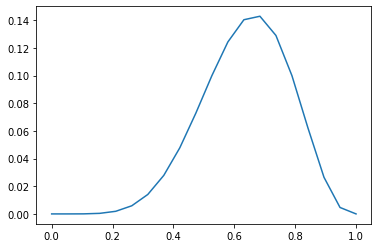

In [10]:
plt.plot(p_grid, posterior)

In [11]:
def binom_grid_approximation(p_grid_size, w, n, prior=None):
    ### define grid
    p_grid = np.linspace(0, 1, p_grid_size)

    ### define prior
    if not prior:
        prior = np.repeat(1, p_grid_size)
    else:
        prior = prior

    ### likelihood at each value in grid
    likelihood = ss.binom.pmf(w, n, p=p_grid)

    ### compute product of likelihood and prior
    unstd_posterior = likelihood * prior

    ### standardize posterior
    posterior = unstd_posterior / sum(unstd_posterior)

    plt.plot(p_grid, posterior)

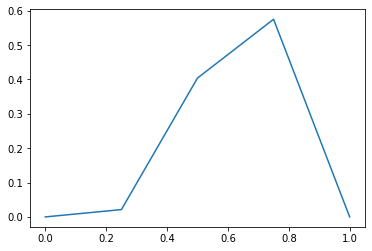

In [12]:
### only 5 grid points
binom_grid_approximation(5, 6, 9)

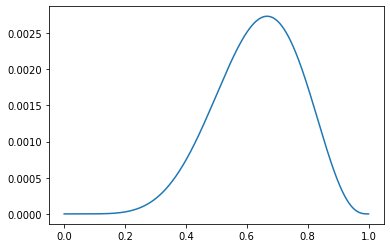

In [13]:
### 1000 grid points
binom_grid_approximation(1000, 6, 9)

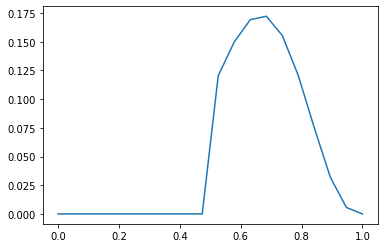

In [14]:
prior = [0 if x < 0.5 else 1 for x in p_grid]
binom_grid_approximation(20, 6, 9, prior)

### Part 3: Grid Approximation and Bayesian Penalty Kicks

In [15]:
# source https://github.com/beta2k/penaltyKicksTransfermarkt
df = pd.read_csv('../data/top_penalties.csv')
df['Success Rate'] = np.round(df['Successes'] / df['Total Attempts'], 2)

In [44]:
def get_player_posterior(name, df, prior=None):
    """
    Function for getting posterior probability (with flat priors)
    from df
    
    Inputs
    -----
    prior: lst
        list of prior probabilities, if None, use flat prior
    """
    makes = df[df['Name'] == name]['Successes'].values[0]
    attempts = df[df['Name'] == name]['Total Attempts'].values[0]
    
    
    p_grid1 = np.linspace(0, 1, 1000)
    if prior == None:
        prior1 = [1] * 1000
    else:
        prior1 = prior
    likelihoods = ss.binom.pmf(makes, attempts, p=p_grid1)
    unstd_posterior = likelihoods * prior1
    posterior = unstd_posterior / sum(unstd_posterior)
    
    return posterior

In [17]:
cristiano_posterior = get_player_posterior('Cristiano Ronaldo', df)
messi_posterior = get_player_posterior('Lionel Messi', df)
hazard_posterior = get_player_posterior('Eden Hazard', df)
zlatan_posterior = get_player_posterior('Zlatan Ibrahimovic', df)
neymar_posterior = get_player_posterior('Neymar', df)
suarez_posterior = get_player_posterior('Luis Suárez', df)

#### Which penalty kicker do I choose? Do I go purely off percentange?

In [55]:
players = ['Cristiano Ronaldo' ,'Lionel Messi', 'Eden Hazard',
          'Zlatan Ibrahimovic', 'Neymar', 'Luis Suárez']

df[df['Name'].isin(players)].sort_values('Success Rate', ascending=False)

,League,Club,Position,Name,Successes,Failures,Total Attempts,Success Rate
6,Premier League,Manchester United,Centre-Forward,Zlatan Ibrahimovic,67,9,76,0.88
12,Premier League,Chelsea FC,Left Wing,Eden Hazard,35,5,40,0.88
50,LaLiga,Real Madrid,Left Wing,Cristiano Ronaldo,92,18,110,0.84
52,LaLiga,FC Barcelona,Left Wing,Neymar,31,8,39,0.79
53,LaLiga,FC Barcelona,Right Wing,Lionel Messi,69,19,88,0.78
54,LaLiga,FC Barcelona,Centre-Forward,Luis Suárez,29,9,38,0.76


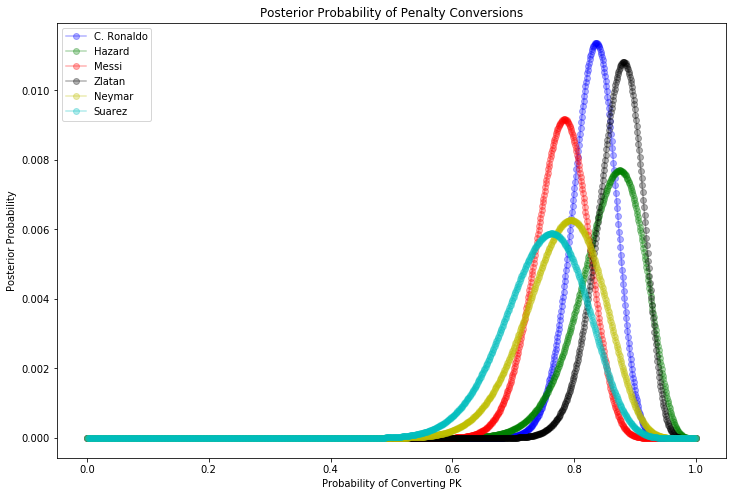

In [56]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(figsize=(12, 8))

ax.plot(p_grid, cristiano_posterior, color='b', marker='o', label='C. Ronaldo', alpha=0.3)
ax.plot(p_grid, hazard_posterior, color='g', marker='o', label='Hazard', alpha=0.3)
ax.plot(p_grid, messi_posterior, color='r', marker='o', label='Messi', alpha=0.3)
ax.plot(p_grid, zlatan_posterior, color='k', marker='o', label='Zlatan', alpha=0.3)
ax.plot(p_grid, neymar_posterior, color='y', marker='o', label='Neymar', alpha=0.3)
ax.plot(p_grid, suarez_posterior, color='c', marker='o', label='Suarez', alpha=0.3)
ax.set_title('Posterior Probability of Penalty Conversions')
ax.set_xlabel('Probability of Converting PK')
ax.set_ylabel('Posterior Probability')
ax.legend();

In [57]:
#### setting a prior

In [58]:
class Prior:
    def __init__(self, alpha0=1, alpha1=1):
        """Beta prior for binary data."""

        self.a0 = alpha0
        self.a1 = alpha1
        self.p0rv = ss.beta(self.a0, self.a1)

    def interval(self, prob):
        """End points for region of pdf containing `prob` of the
        pdf-- this uses the cdf and inverse.

        Ex: interval(0.95)
        """

        return self.p0rv.interval(prob)

    def mean(self):
        """Returns prior mean."""

        return self.p0rv.mean()

    def pdf(self, p0):
        """Probability density at p0."""

        return self.p0rv.pdf(p0)

    def plot(self):
        """A plot showing mean and 95% credible interval."""

        fig, ax = plt.subplots(1, 1)
        x = np.arange(0., 1., 0.01)

        # get prior mean p0
        mean = self.mean()

        # get low/high pts containg 95% probability
        low_p0, high_p0 = self.interval(0.95)
        x_prob = np.arange(low_p0, high_p0, 0.01)

        # plot pdf
        ax.plot(x, self.pdf(x), 'r-')

        # fill 95% region
        ax.fill_between(x_prob, 0, self.pdf(x_prob),
                        color='red', alpha='0.2' )

        # mean
        ax.stem([mean], [self.pdf(mean)], linefmt='r-',
                markerfmt='ro', basefmt='w-')

        ax.set_xlabel('')
        ax.set_ylabel('Prior PDF')
        ax.set_ylim(0., 1.1*np.max(self.pdf(x)))

        plt.show()

/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


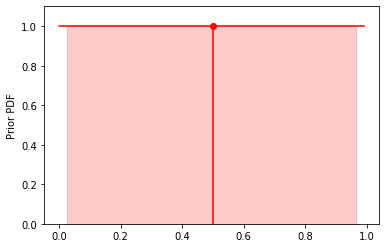

Prior mean: 0.5
95% CI: 0.03 -- 0.975


In [59]:
pri = Prior(1, 1)
pri.plot()
print(f"Prior mean: {pri.mean()}")
cred_int = pri.interval(0.95)
print(f"95% CI: {np.round(cred_int[0], 2)} -- {cred_int[1]}")

/Users/david/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


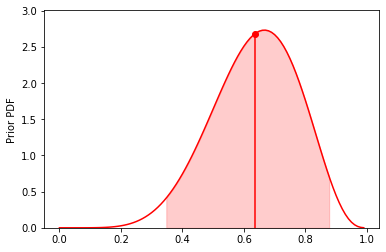

Prior mean: 0.6363636363636364
95% CI: 0.35 -- 0.8784477418801728


In [60]:
pri = Prior(7, 4)
pri.plot()
print(f"Prior mean: {pri.mean()}")
cred_int = pri.interval(0.95)
print(f"95% CI: {np.round(cred_int[0], 2)} -- {cred_int[1]}")

In [61]:
len(p_grid)

1000

In [62]:
beta_priors = [pri.pdf(x) for x in p_grid]

In [63]:
lambert_posterior_b = get_player_posterior('Rickie Lambert', df, beta_priors)
fabinho_posterior_b = get_player_posterior('Fabinho', df, beta_priors)
chicharito_posterior_b = get_player_posterior('Chicharito', df, beta_priors)
zlatan_posterior_b = get_player_posterior('Zlatan Ibrahimovic', df, beta_priors)
ozil_posterior_b = get_player_posterior('Mesut Özil', df, beta_priors)
feilhaber_posterior_b = get_player_posterior('Benny Feilhaber', df, beta_priors)

lambert_posterior = get_player_posterior('Rickie Lambert', df)
fabinho_posterior = get_player_posterior('Fabinho', df)
chicharito_posterior = get_player_posterior('Chicharito', df)
zlatan_posterior = get_player_posterior('Zlatan Ibrahimovic', df)
ozil_posterior = get_player_posterior('Mesut Özil', df)
feilhaber_posterior = get_player_posterior('Benny Feilhaber', df)

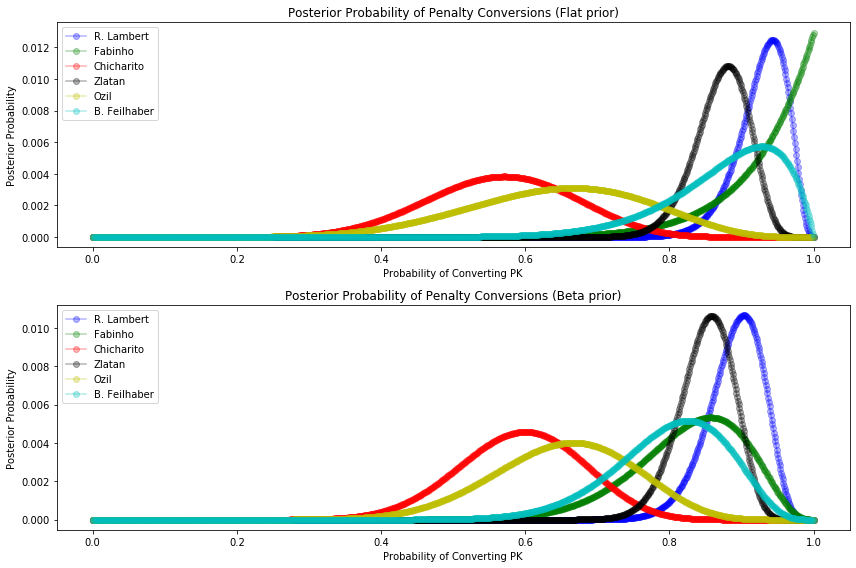

In [64]:
p_grid = np.linspace(0, 1, 1000)

fig, ax = plt.subplots(2, 1, figsize=(12, 8))

flat1 = [lambert_posterior, fabinho_posterior, chicharito_posterior, 
       zlatan_posterior, ozil_posterior, feilhaber_posterior]

beta1 = [lambert_posterior_b, fabinho_posterior_b, chicharito_posterior_b,
       zlatan_posterior_b, ozil_posterior_b, feilhaber_posterior_b]

posts1 = [flat1, beta1]

for i, ax in enumerate(fig.axes):
    ax.plot(p_grid, posts1[i][0], color='b', marker='o', label='R. Lambert', alpha=0.3)
    ax.plot(p_grid, posts1[i][1], color='g', marker='o', label='Fabinho', alpha=0.3)
    ax.plot(p_grid, posts1[i][2], color='r', marker='o', label='Chicharito', alpha=0.3)
    ax.plot(p_grid, posts1[i][3], color='k', marker='o', label='Zlatan', alpha=0.3)
    ax.plot(p_grid, posts1[i][4], color='y', marker='o', label='Ozil', alpha=0.3)
    ax.plot(p_grid, posts1[i][5], color='c', marker='o', label='B. Feilhaber', alpha=0.3)
    if i == 0:
        ax.set_title('Posterior Probability of Penalty Conversions (Flat prior)')
    else:
        ax.set_title('Posterior Probability of Penalty Conversions (Beta prior)')

    ax.set_xlabel('Probability of Converting PK')
    ax.set_ylabel('Posterior Probability')
    ax.legend();
fig.tight_layout()